# Principal Component Analysis - Key Ideas

### Loading Libraries

In [3]:
# Numerical Computing
import numpy as np
from numpy.linalg import lstsq
from numpy.random import randn, seed

# Data Manipulation
import pandas as pd

# Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Warnings
import warnings

# SciPy
from scipy.spatial.distance import pdist, squareform

# Scikit-Learn
from sklearn.decomposition import PCA

In [4]:
seed(42)

sns.set_style('white')

warnings.filterwarnings('ignore')

### Linear Projection: `Principal Component Analysis`

#### Creating Noisy, Correlated Data from Signal

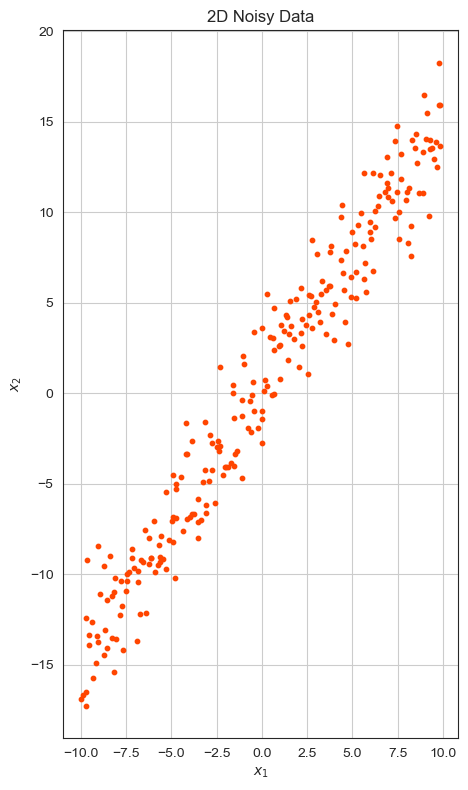

In [6]:
n_signals = 250

x1 = np.linspace(-10, 10, n_signals) + .1 * randn(n_signals)
x2 = 1.5 * x1 + 2 * randn(n_signals)
data = pd.DataFrame({'$x_1$': x1, '$x_2$': x2})
ax = data.plot.scatter(x=0, y=1, s=10, title='2D Noisy Data', figsize=(7,8), color='orangered')
ax.set_aspect('equal')
plt.tight_layout()
plt.grid(True)
plt.show()

#### Computing Principal Components

In [8]:
# PCA Model
pca = PCA()

# Fitting Model
pca.fit(data)
pca.components_

array([[ 0.54662526,  0.83737735],
       [ 0.83737735, -0.54662526]])

In [9]:
mean = pca.mean_
mean

array([-0.00673373,  0.25187838])

In [10]:
pc1, pc2 = np.split(pca.components_.T, 2, axis=1)
pc1

array([[0.54662526],
       [0.83737735]])

#### Checking Share of Explained Variance

In [11]:
pca.explained_variance_ratio_

array([0.98995308, 0.01004692])

### Components are Orthogonal to Each Other

In [12]:
np.dot(pc1.T, pc2)

array([[-2.0636677e-17]])

### Plotting Principal Components as New Basis Vectors

In [13]:
l1, l2 = pca.singular_values_ / 10

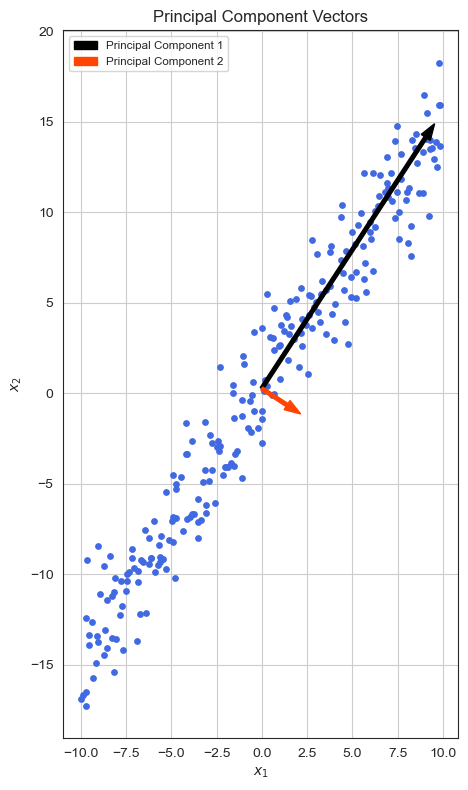

In [18]:
ax = data.plot.scatter(x=0, y=1, s=15, title='Principal Component Vectors', figsize=(6,8), color='royalblue')

ax.set_aspect('equal')
origin_x, origin_y = pca.mean_
dx1, dy1 = np.squeeze(pc1.T) * l1
dx2, dy2 = np.squeeze(pc2.T) * l2
pc1_arrow = ax.arrow(origin_x, origin_y, dx1, dy1,  width=.2, color='k')
pc2_arrow = ax.arrow(origin_x, origin_y, dx2, dy2,  width=.2, color='orangered')
plt.legend([pc1_arrow, pc2_arrow], 
           ['Principal Component 1', 'Principal Component 2'], 
           fontsize='small')
plt.tight_layout()
plt.grid(True)
plt.show()

### Project 2-D Data onto The 1st Principal Component

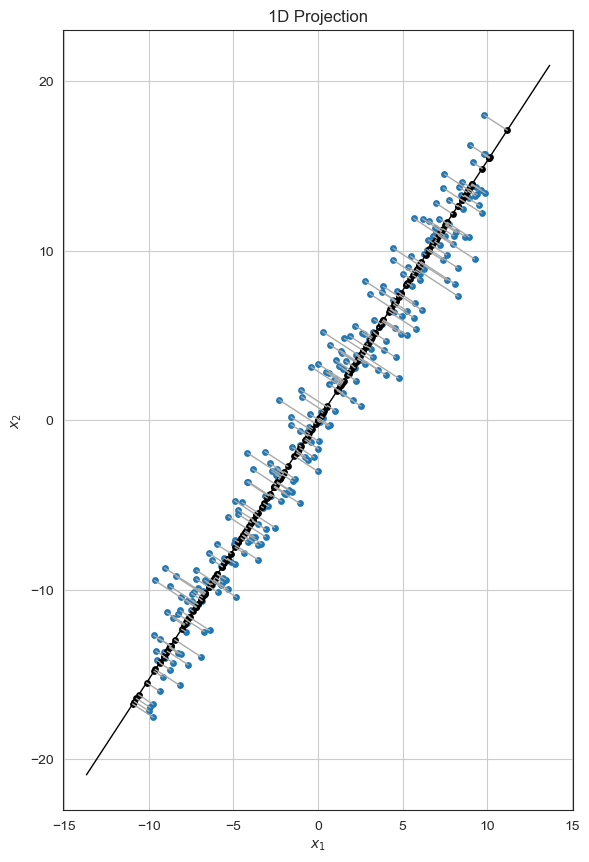

In [22]:
data_ = data.sub(data.mean())
X_ = data_.values
x_, y_ = X_.T
ax = pd.DataFrame({'$x_1$': x_, '$x_2$': y_}).plot.scatter(x='$x_1$', 
                                                           y='$x_2$', 
                                                           s=15, 
                                                           title='1D Projection', 
                                                           figsize=(6, 12))
ax.set_aspect('equal')

# plot first component
t = np.linspace(-25, 25, n_signals)
pc_x, pc_y = t * pc1
ax.plot(pc_x, pc_y, c='k', lw=1)

# project original data on first component
proj_x, proj_y = (X_.dot(pc1) * pc1.T).T
ax.scatter(proj_x, proj_y, s=15, c='k')

# plot link from data to projected points
lines_x, lines_y = np.c_[x_, proj_x], np.c_[y_, proj_y]
ax.plot(lines_x.T, lines_y.T, lw=1, c='darkgray')
plt.tight_layout()
plt.grid(True)
plt.show()

### Plot 1-D Representation

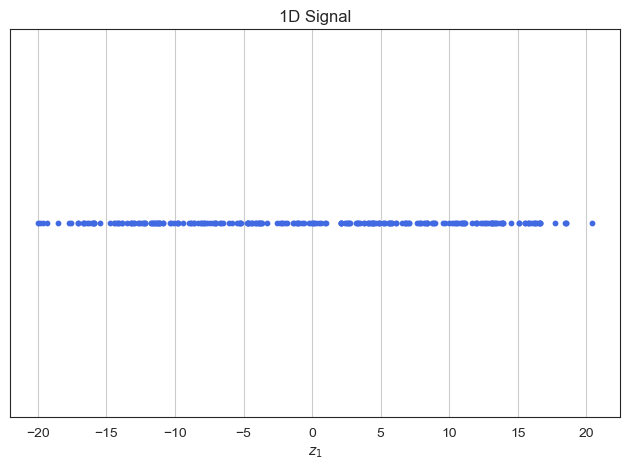

In [24]:
projection1D = data_.dot(pc1)
ax = projection1D.rename(columns={0: '$z_1$'})\
    .assign(x2=0).plot.scatter(x='$z_1$', y='x2', s=10, title='1D Signal', color='royalblue')
ax.get_yaxis().set_visible(False)
plt.tight_layout();
plt.grid(True)
plt.show()

### Comparing to Linear Regression

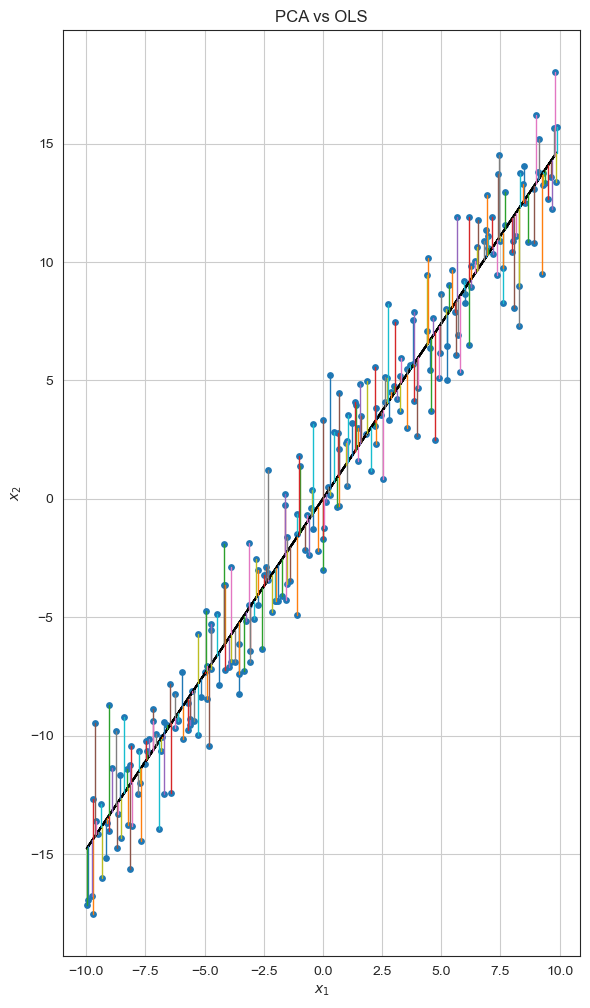

In [26]:
ax = pd.DataFrame({'$x_1$': x_, '$x_2$': y_}).plot.scatter(x='$x_1$', 
                                                           y='$x_2$', 
                                                           s=15, 
                                                           title='PCA vs OLS', 
                                                           figsize=(6, 12))
ax.set_aspect('equal')

# get OLS line
reg_X = np.column_stack((x_, np.ones_like(x_)))
(m, b), _, _, _ = lstsq(reg_X, y_)
reg_y = m * x_ + b
ax.plot(x_, reg_y, c='k')

# plot residuals
lines_x, lines_y = np.c_[x_, x_], np.c_[y_, reg_y]
ax.plot(lines_x.T, lines_y.T, lw=1)
plt.tight_layout()
plt.grid(True)
plt.show()

### Combined Figure

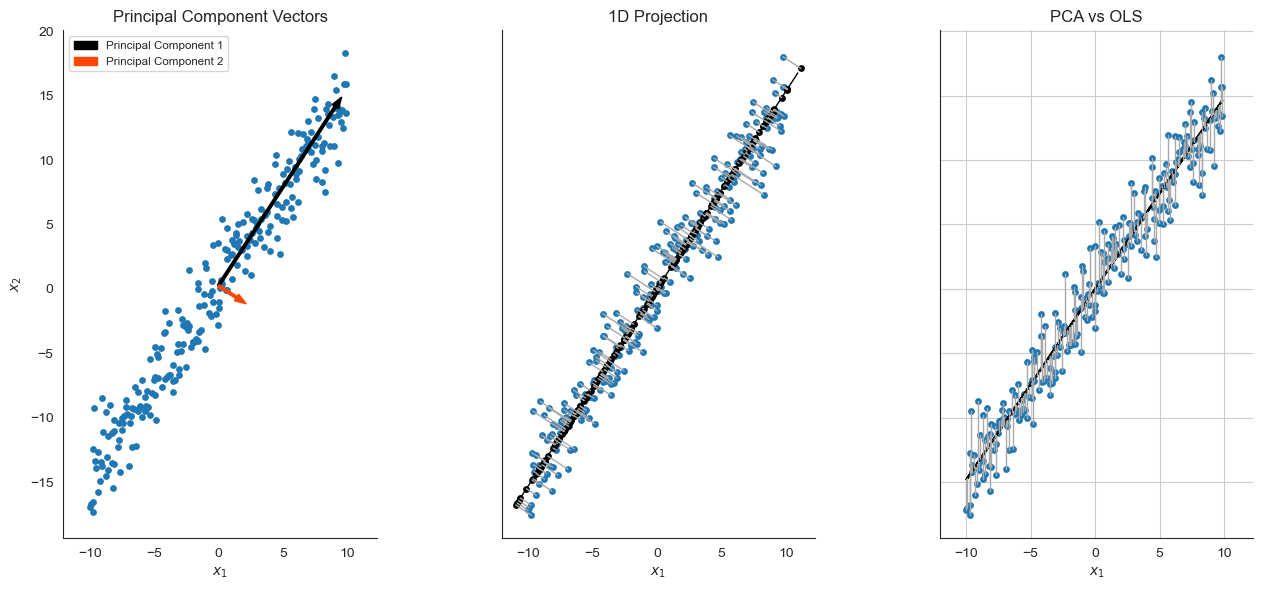

In [31]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 6), sharex=True, sharey=True)

title='Principal Component Vectors'
data.plot.scatter(x=0, y=1, s=15, ax=axes[0], title=title)
axes[0].set_aspect('equal')

origin_x, origin_y = pca.mean_
dx1, dy1 = np.squeeze(pc1.T) * l1
dx2, dy2 = np.squeeze(pc2.T) * l2
pc1_arrow = axes[0].arrow(origin_x, origin_y, dx1, dy1,  width=.2, color='k')
pc2_arrow = axes[0].arrow(origin_x, origin_y, dx2, dy2,  width=.2, color='orangered')
axes[0].legend([pc1_arrow, pc2_arrow],
               ['Principal Component 1', 'Principal Component 2'],
               fontsize='small')

# de-mean data, convert to numpy array
data_ = data.sub(data.mean())
X_ = data_.values
x_, y_ = X_.T
pd.DataFrame({'$x_1$': x_, '$x_2$': y_}).plot.scatter(x='$x_1$',
                                                      y='$x_2$',
                                                      s=15,
                                                      title='1D Projection',
                                                      ax=axes[1])
axes[1].set_aspect('equal')

# plot first component
t = np.linspace(-20, 20, n_signals)
pc_x, pc_y = t * pc1
axes[1].plot(pc_x, pc_y, c='k', lw=1)

# project original data on first component
proj_x, proj_y = (X_.dot(pc1) * pc1.T).T
axes[1].scatter(proj_x, proj_y, s=15, c='k')

# plot link from data to projected points
lines_x, lines_y = np.c_[x_, proj_x], np.c_[y_, proj_y]
axes[1].plot(lines_x.T, lines_y.T, lw=1, c='darkgrey')
plt.grid(True)

pd.DataFrame({'$x_1$': x_, '$x_2$': y_}).plot.scatter(x='$x_1$',
                                                      y='$x_2$',
                                                      s=15,
                                                      title='PCA vs OLS',
                                                      ax=axes[2])
ax = axes[2].set_aspect('equal')

# get OLS line
reg_X = np.column_stack((x_, np.ones_like(x_)))
(m, b), _, _, _ = lstsq(reg_X, y_)
reg_y = m * x_ + b
ax = axes[2].plot(x_, reg_y, c='k')

# plot residuals
lines_x, lines_y = np.c_[x_, x_], np.c_[y_, reg_y]
ax = axes[2].plot(lines_x.T, lines_y.T, lw=1, c='darkgrey')

sns.despine()
fig.tight_layout()
plt.grid(True)
plt.show();

### Recovering Data using Inverse Transformation 1-D towards 2-D

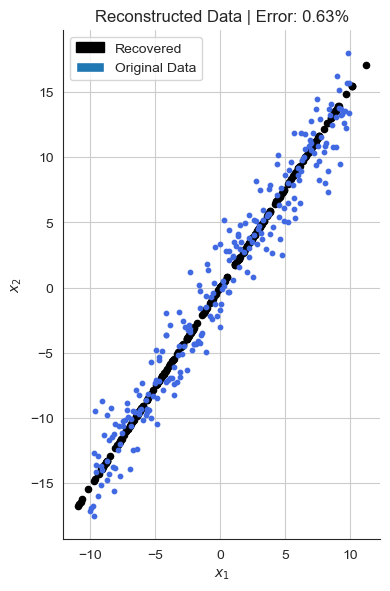

In [33]:
recovered_data = projection1D.dot(pc1.T).rename(columns={0: '$x_1$', 1: '$x_2$'})

rms_reconstruction_error = np.sqrt(np.mean(np.sum(np.square(recovered_data-data_), axis=1)))

rss_data = np.sqrt(np.sum(data_.values**2))

relative_loss = rms_reconstruction_error / rss_data

title='Reconstructed Data | Error: {:.2%}'.format(relative_loss)
ax = recovered_data.plot.scatter(x=0, y=1, title=title, c='k')
ax.set_aspect('equal')
data_.plot.scatter(x=0, y=1, s=10, ax=ax, figsize=(4,8), color='royalblue')
plt.legend(handles=[Patch(color='k', label='Recovered'),  
                    Patch(label='Original Data')])
sns.despine()
plt.tight_layout()
plt.grid(True)
plt.show()

#### Projection & Inverse Transformation Leading to Same Result

In [34]:
np.allclose(recovered_data, X_.dot(pc1) * pc1.T)

True